# OBJETIVO

Predecir si una persona gana o no mas de 50k/año

# MOTIVACION

¿Por que algunas personas ganan más que otras?
Tiene que ver con el trabajo? Con los estudios? Con la edad? Con la raza? Influye el género?
Por que hay gente que se esfuerza durante años estudiando una carrera universitaria y que no termina viendo resultados esperados? o por que hay gente que nadie se hubiera imaginado y terminan amasando fortunas?
Entre otras mas, estas fueron las motivaciones para el estudio.


# INTRODUCCION

Importo librerias que usare

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier as knn
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score
import plotly as pl
import plotly.express as px

Creo el dataset

In [ ]:
df=pd.read_csv("/content/CENSUS_INCOME.csv")

Ejemplo del dataset

In [ ]:
df.head(10)

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


# SOBRE EL DATASET

Informacion varia del dataset. Es importante saber los tipos de datos de cada columna y la cantidad de filas/individuos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             32561 non-null  int64 
 1   WORKCLASS       32561 non-null  object
 2   FNLWGT          32561 non-null  int64 
 3   EDUCATION       32561 non-null  object
 4   EDUCATION-NUM   32561 non-null  int64 
 5   MARITAL-STATUS  32561 non-null  object
 6   OCCUPATION      32561 non-null  object
 7   RELATIONSHIP    32561 non-null  object
 8   RACE            32561 non-null  object
 9   SEX             32561 non-null  object
 10  CAPITAL-GAIN    32561 non-null  int64 
 11  CAPITAL-LOSS    32561 non-null  int64 
 12  HOURS-PER-WEEK  32561 non-null  int64 
 13  NATIVE COUNTRY  32561 non-null  object
 14  INCOME          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# ANALISIS UNIVARIADO


Informacion que uso para el pptx. Me dice que porcentaje gana mas y menos de 50k. Despues hago los respectivos graficos.

In [ ]:
df.INCOME.value_counts(normalize=True)*100

 <=50K    75.919044
 >50K     24.080956
Name: INCOME, dtype: float64

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='INCOME', title='Histograma')
fig.show()

In [ ]:
fig = px.histogram(df, x='AGE', color='SEX', nbins=15, title='Histograma de Edades por Género')

# Mostrar el gráfico
fig.show()

<Axes: xlabel='INCOME', ylabel='Count'>

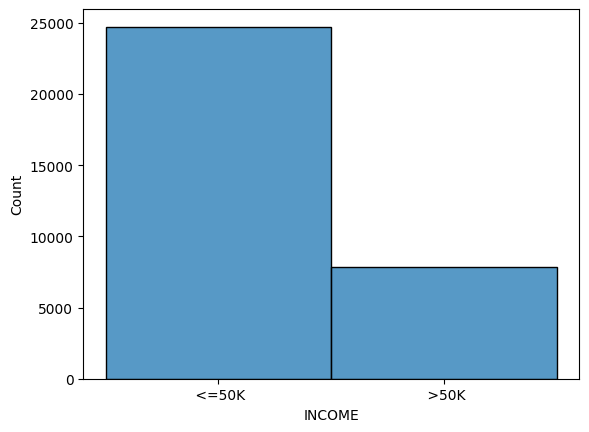

In [ ]:
sns.histplot(df,x='INCOME')

La siguiente tabla es usada para el pptx. Me dice el promedio y la cantidad de observaciones del dataset segun sexo. Despues hago el grafico correspondiente.

In [ ]:
resultados = df.groupby('SEX')['AGE'].agg(['mean', 'count']).reset_index()
resultados.columns = ['SEX', 'Promedio_Edad', 'Observaciones']
resultados

,SEX,Promedio_Edad,Observaciones
0,Female,36.858230,10771
1,Male,39.433547,21790


Vemos una agrupacion por ingresos y raza. Usado el ppt

In [ ]:
pd.set_option('display.max_colwidth', 200)
resultados = df.groupby(['RACE','INCOME'])['AGE'].agg(['count']).reset_index()
resultados.columns = ['RACE','INCOME', 'Observaciones']
resultados=resultados.sort_values(by=["INCOME","Observaciones"], ascending=False)

resultados

,RACE,INCOME,Observaciones
9,White,>50K,7117
5,Black,>50K,387
3,Asian-Pac-Islander,>50K,276
1,Amer-Indian-Eskimo,>50K,36
7,Other,>50K,25
8,White,<=50K,20699
4,Black,<=50K,2737
2,Asian-Pac-Islander,<=50K,763
0,Amer-Indian-Eskimo,<=50K,275
6,Other,<=50K,246


Vemos una agrupacion por pais de origen e ingresos. Usado el ppt

In [ ]:
pd.set_option('display.max_colwidth', 200)
resultados = df.groupby(['NATIVE COUNTRY','INCOME'])['AGE'].agg(['count']).reset_index()
resultados.columns = ['NATIVE COUNTRY','INCOME', 'Observaciones']
resultados=resultados.sort_values(by=["INCOME","Observaciones"], ascending=False)
resultados.drop(index=[0, 1], inplace=True)
resultados

,NATIVE COUNTRY,INCOME,Observaciones
77,United-States,>50K,7171
59,Philippines,>50K,61
23,Germany,>50K,44
38,India,>50K,40
5,Canada,>50K,39
...,...,...,...
31,Honduras,<=50K,12
35,Hungary,<=50K,10
80,Yugoslavia,<=50K,10
66,Scotland,<=50K,9


Vemos cuantas hombres y mujeres posee el DataFrame. Usado en el ppt

<Axes: xlabel='AGE', ylabel='Count'>

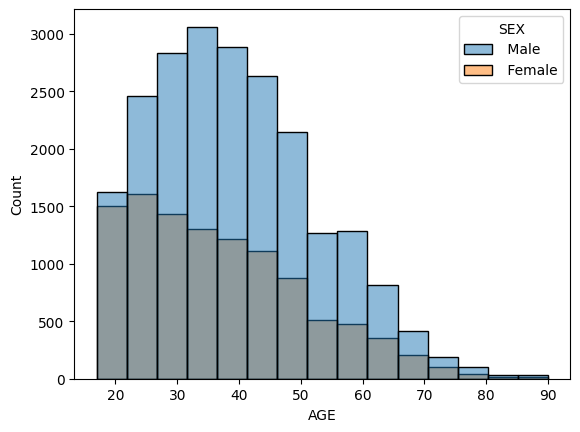

In [ ]:
sns.histplot(df,x='AGE',hue="SEX",bins=15)

# ANALISIS BIVARIADO

Como afecta el genero a pertenecer al club de los >50k o no?

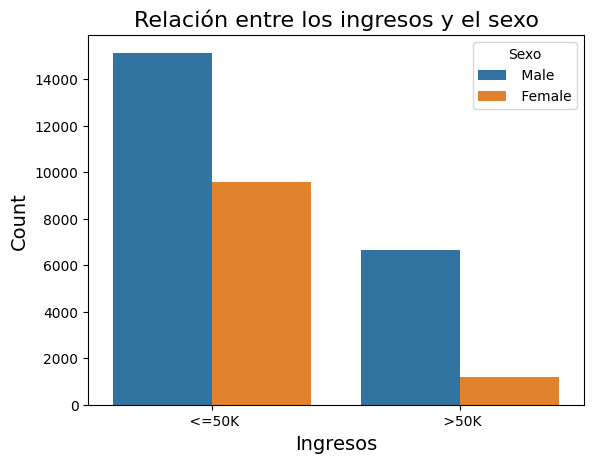

In [ ]:
sns.countplot(x='INCOME', hue='SEX', data=df)

# Ajustar el diseño
plt.title('Relación entre los ingresos y el sexo', fontsize=16)
plt.xlabel('Ingresos', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Sexo')

# Mostrar el gráfico
plt.show()

Creamos una funcion para calcular la correlacion entre dos variables categoricas. En este caso si gana o no mas de 50k y el sexo. La funcion nos servira en otros momentos por eso es importante crearla. La función utiliza una tabla de contingencia (organizando datos categóricos en una matriz), realiza la prueba de chi-cuadrado (evaluando la independencia entre las variables categóricas) y, finalmente, calcula el estadístico de Cramer's V (una medida normalizada de la fuerza de la asociación entre las variables categóricas).

In [ ]:
import scipy.stats as stats
from sklearn.feature_selection import chi2



# Size of the sample
n = len(df)



def corr_cat_cat(col1,col2):
  #tabla de contigencia
  cont_table = pd.crosstab(index= df[col1],
                          columns= df[col2])
  X2 = stats.chi2_contingency(cont_table)
  k=min(cont_table.shape)
  chi_stat = X2[0]

  # Calculate Cramer's V
  V = np.sqrt((chi_stat/n) / (k-1))
  return V

La correlacion nos da :

In [ ]:
corr_cat_cat('INCOME','SEX')

0.21590381954916826

**Procedo a analizar diferentes correlaciones entre diferentes variables categoricas. Ademas del grafico, a continuacion se vera la metrica que indica objetivamente si hay relacion o no. Objetivamente ya que por mas que el grafico pueda sugerir algo, al evaluar la muestra detalladamente mediante indicadores matematicos nos pueden dar mejor idea de donde estamos parados.**

<Axes: xlabel='EDUCATION-NUM', ylabel='RACE'>

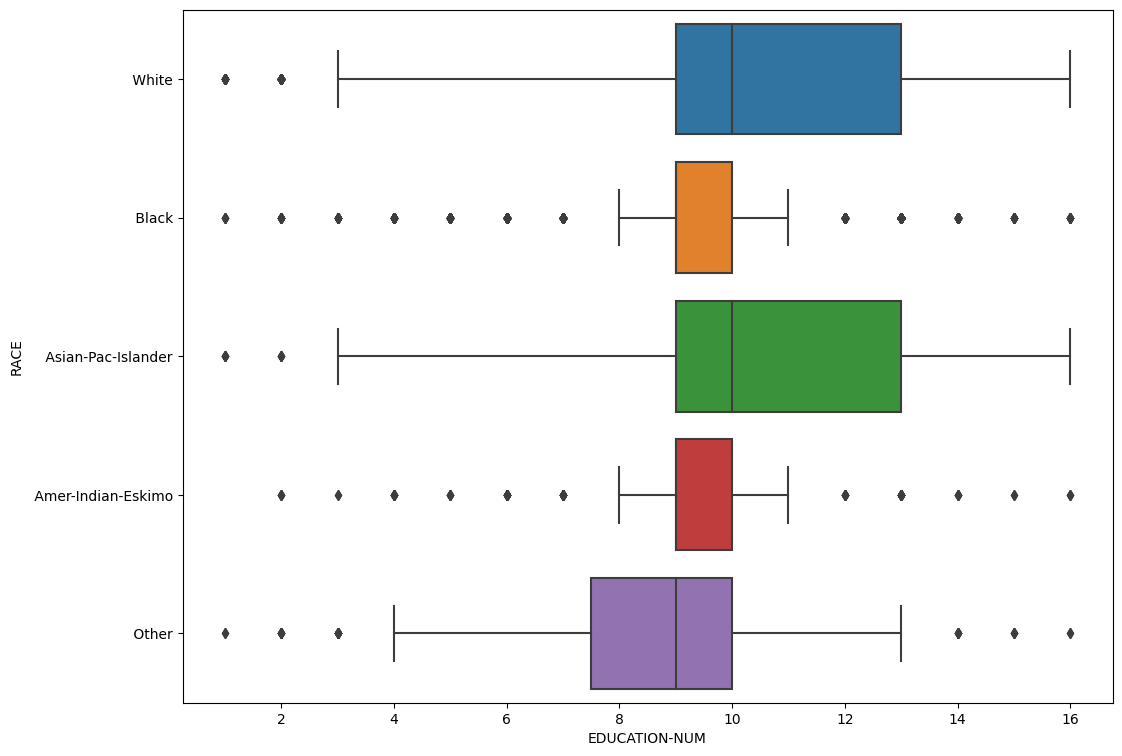

In [ ]:
sns.boxplot(data=df,x="EDUCATION-NUM",y="RACE")

In [ ]:
from scipy.stats import f_oneway
anova_result = f_oneway(*[df['EDUCATION-NUM'][df['RACE'] == category] for category in df['RACE'].unique()])

print(f"ANOVA F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.3f}")

ANOVA F-statistic: 99.05
P-value: 0.000


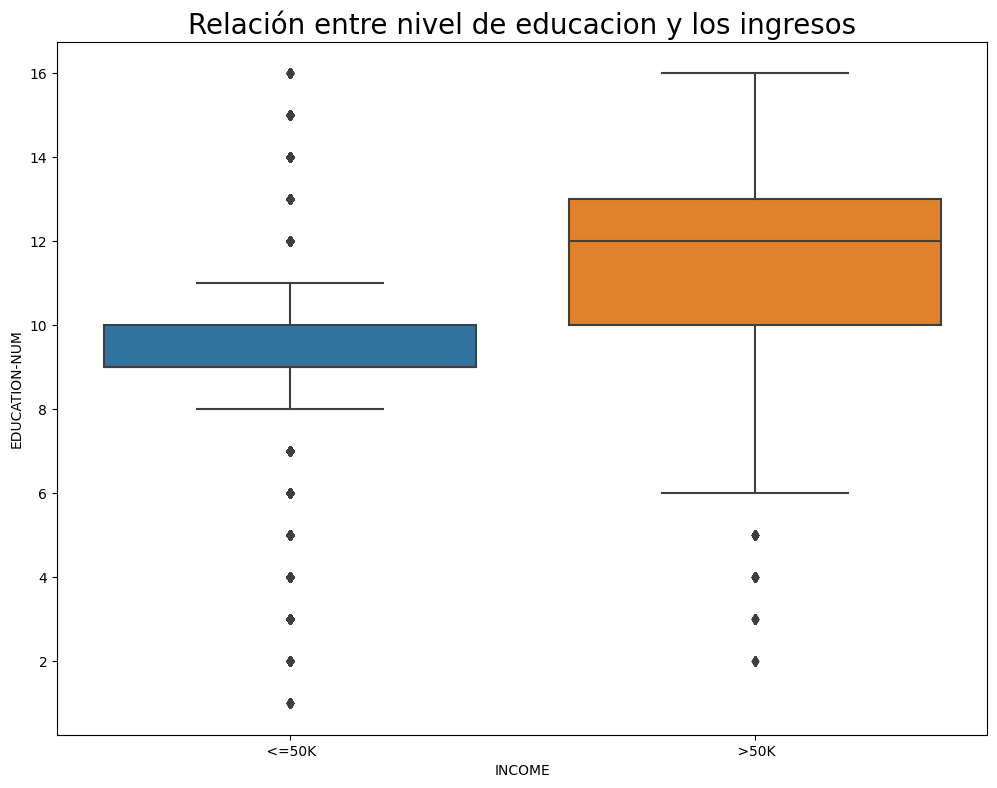

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x='INCOME', y='EDUCATION-NUM', data=df)
plt.title('Relación entre nivel de educacion y los ingresos', fontsize = 20)

plt.show()

In [ ]:

from sklearn.preprocessing import LabelEncoder
from scipy import stats
le = LabelEncoder()
#le.fit_transform(df['NATIVE COUNTRY'])
a = le.fit_transform(df['INCOME'])
b = df["EDUCATION-NUM"]

stats.pointbiserialr(a, b)

SignificanceResult(statistic=0.335153952690941, pvalue=0.0)

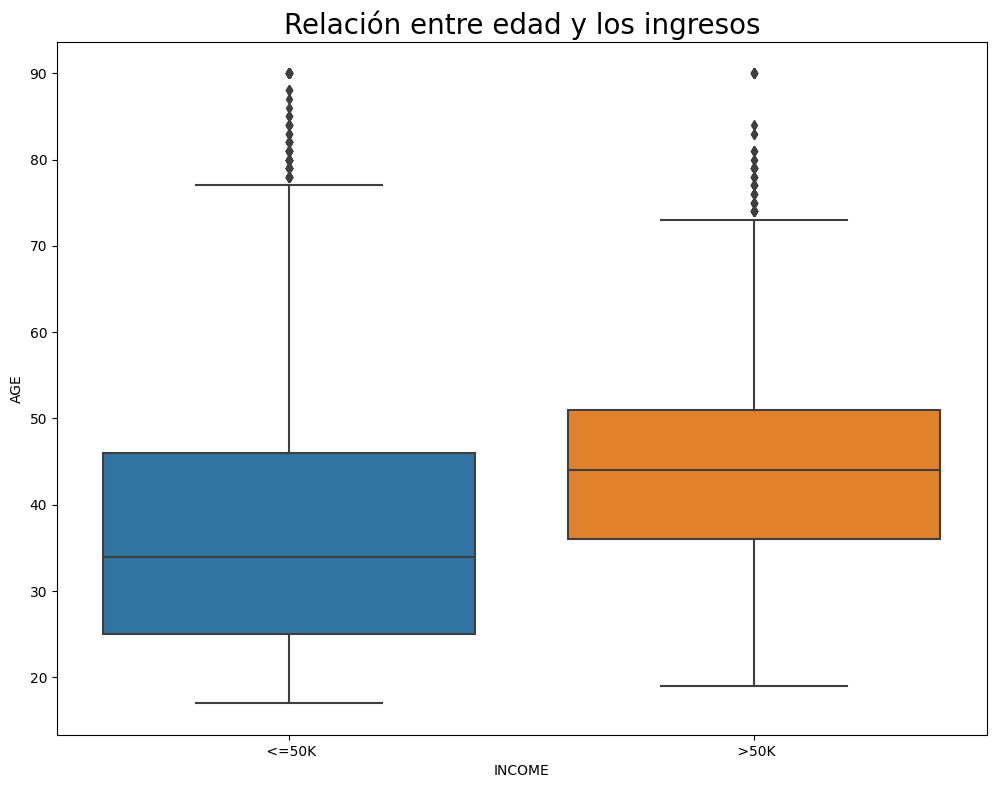

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x='INCOME', y='AGE', data=df)
plt.title('Relación entre edad y los ingresos', fontsize = 20)

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
le = LabelEncoder()
#le.fit_transform(df['NATIVE COUNTRY'])
a = le.fit_transform(df['INCOME'])
b = df["AGE"]

stats.pointbiserialr(a, b)

SignificanceResult(statistic=0.2340371026488576, pvalue=0.0)

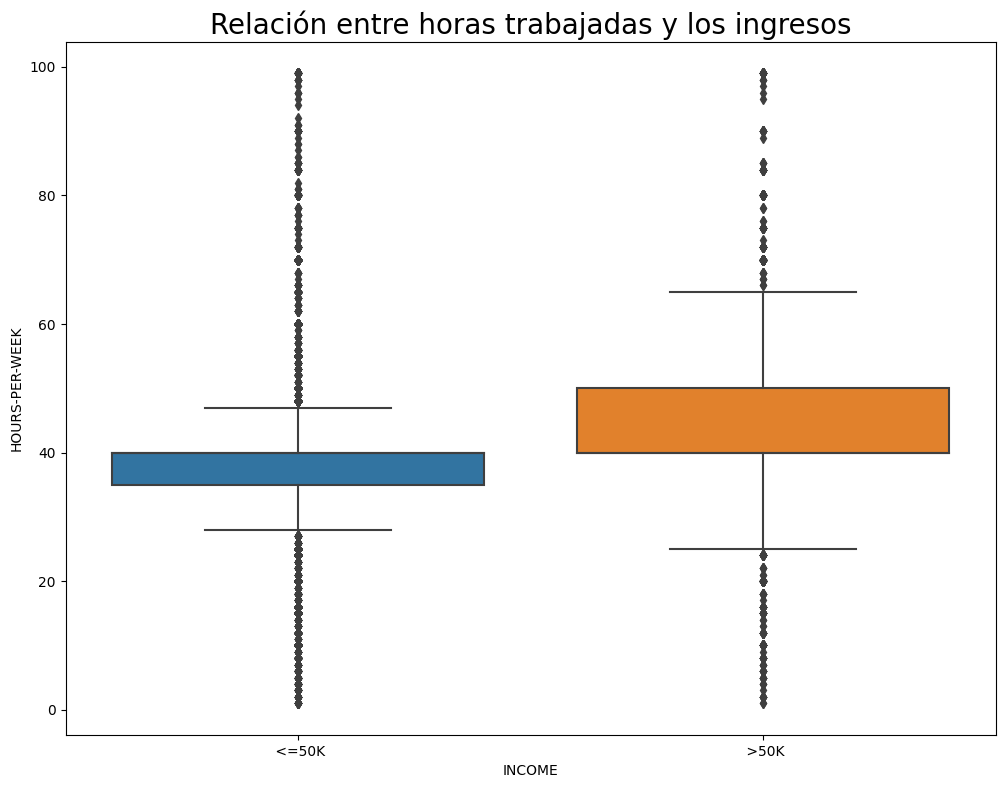

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x='INCOME', y='HOURS-PER-WEEK', data=df)
plt.title('Relación entre horas trabajadas y los ingresos', fontsize = 20)

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
le = LabelEncoder()
#le.fit_transform(df['NATIVE COUNTRY'])
a = le.fit_transform(df['INCOME'])
b = df["HOURS-PER-WEEK"]

stats.pointbiserialr(a, b)

SignificanceResult(statistic=0.2296890656708105, pvalue=0.0)

**Esto podria agregarse al power. Por tener ya demasiadas diapositivas decidi no incluirlo. Pero hubiera sido una buena idea hablar sobre las areas laborales y la cantidad de gente que gana mas de 50k al año**

In [ ]:
# Encoding 'INCOME' using LabelEncoder
le = LabelEncoder()
df['INCOME_ENCODED'] = le.fit_transform(df['INCOME'])

# Grouping by 'OCCUPATION' and summing the encoded 'INCOME'
df_prov = df.groupby('OCCUPATION')['INCOME_ENCODED'].sum().reset_index()
df_prov

,OCCUPATION,INCOME_ENCODED
0,?,191
1,Adm-clerical,507
2,Armed-Forces,1
3,Craft-repair,929
4,Exec-managerial,1968
5,Farming-fishing,115
6,Handlers-cleaners,86
7,Machine-op-inspct,250
8,Other-service,137
9,Priv-house-serv,1


Grafico para el ppt. Relaciono los ingresos y el marital-status

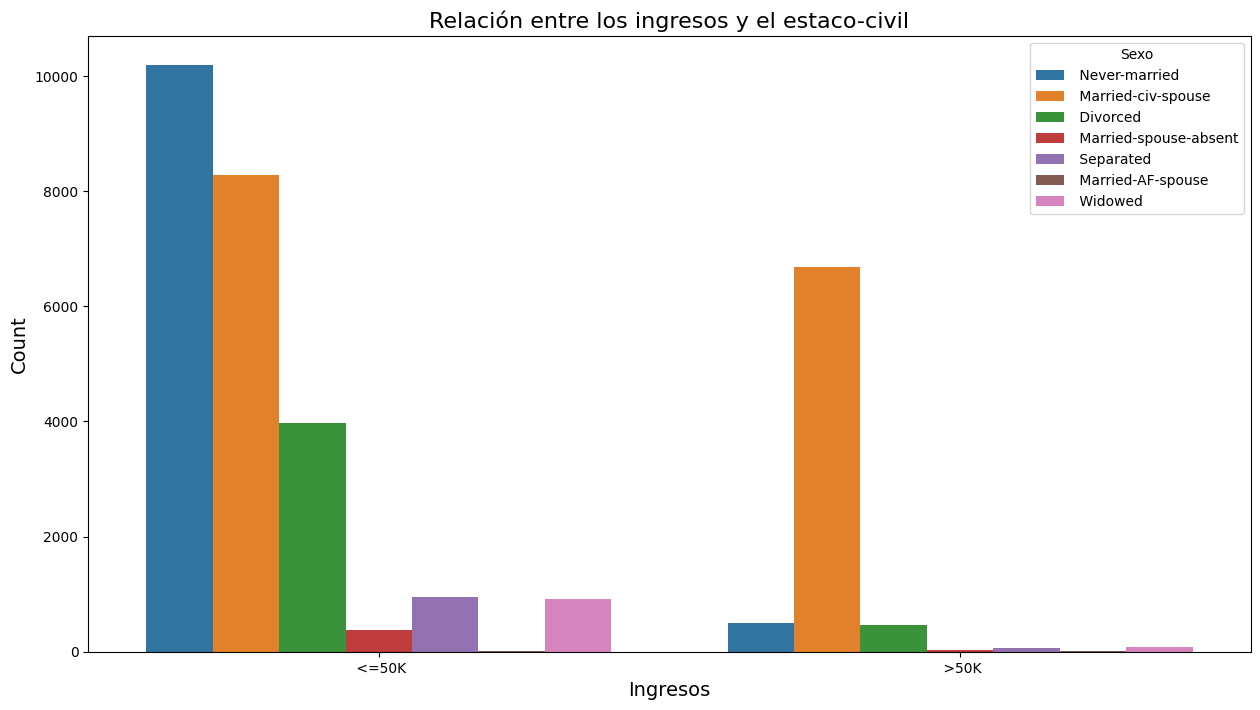

In [ ]:


# Ajustar el diseño
plt.figure(figsize=(15, 8))
sns.countplot(x='INCOME', hue='MARITAL-STATUS', data=df)
plt.title('Relación entre los ingresos y el estaco-civil', fontsize=16)
plt.xlabel('Ingresos', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Sexo')


# Mostrar el gráfico
plt.show()

# DATA WRANGLING

Debido al hecho de que aquellos que tuvieron una ganancia superior a 50000 de capital van a tener claramente un income mayor a 50k, decido sacar esa columna

In [ ]:
df[df['CAPITAL-GAIN']>50000]

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
1246,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,60.0,United-States,>50K
1368,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999.0,0.0,40.0,Japan,>50K
1482,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999.0,0.0,40.0,United-States,>50K
1528,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,50.0,United-States,>50K
1616,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,60.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16740,41,Self-emp-inc,495061,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,70.0,United-States,>50K
17330,47,Private,102308,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,50.0,United-States,>50K
17538,38,Federal-gov,37683,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Female,99999.0,0.0,57.0,Canada,>50K
17644,61,?,139391,Some-college,10,Married-civ-spouse,?,Husband,White,Male,99999.0,0.0,30.0,United-States,>50K


In [ ]:

df=df.drop(["CAPITAL-GAIN","CAPITAL-LOSS"],axis=1)

# **Categoricas a numericas, eliminacion de variables**

Empezamos por MARITAL-STATUS

In [ ]:
df['MARITAL-STATUS'].values

array([' Never-married', ' Married-civ-spouse', ' Divorced', ...,
       ' Married-civ-spouse', ' Married-civ-spouse',
       ' Married-civ-spouse'], dtype=object)

In [ ]:
df['MARITAL-STATUS']=df['MARITAL-STATUS'].str.strip()
df['MARITAL-STATUS'].value_counts()

Married-civ-spouse       8167
Never-married            5847
Divorced                 2420
Separated                 554
Widowed                   544
Married-spouse-absent     227
Married-AF-spouse          13
Name: MARITAL-STATUS, dtype: int64

In [ ]:
df['RELATIONSHIP'].value_counts()

 Husband           7169
 Not-in-family     4572
 Own-child         2790
 Unmarried         1838
 Wife               885
 Other-relative     517
                      1
Name: RELATIONSHIP, dtype: int64

Decido quedarme con Marital-Status ya queda mas informacion que RelationShip, ademas de que no es redundante. Por ejemplo no divide entre esposo y esposa, los junta a todos en Married-civ-spouse. Por lo tanto hago el mapping y elimino la columna relationship

In [ ]:
mapping = {'Married-civ-spouse': 1, 'Never-married': 2, 'Divorced': 3,'Separated ': 4, 'Widowed ': 5, 'Married-spouse-absent': 6,"Married-AF-spouse":7}

df['MARITAL-STATUS'] = df['MARITAL-STATUS'].map(mapping)

In [ ]:
df['MARITAL-STATUS']

0        2.0
1        1.0
2        3.0
3        1.0
4        1.0
        ... 
17767    2.0
17768    2.0
17769    1.0
17770    1.0
17771    1.0
Name: MARITAL-STATUS, Length: 17772, dtype: float64

In [ ]:
df=df.drop(["RELATIONSHIP"],axis=1)

Vemos como va quedando

In [ ]:
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RACE,SEX,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
0,39,State-gov,77516,Bachelors,13,2.0,Adm-clerical,White,Male,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,1.0,Exec-managerial,White,Male,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,3.0,Handlers-cleaners,White,Male,40.0,United-States,<=50K
3,53,Private,234721,11th,7,1.0,Handlers-cleaners,Black,Male,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,1.0,Prof-specialty,Black,Female,40.0,Cuba,<=50K


**Seguimos con la raza**

In [ ]:
df["RACE"].describe()

count      17771
unique         5
top        White
freq       15231
Name: RACE, dtype: object

In [ ]:
df["RACE"].value_counts()

 White                 15231
 Black                  1687
 Asian-Pac-Islander      548
 Amer-Indian-Eskimo      162
 Other                   143
Name: RACE, dtype: int64

Decido hacer get_dummies porque se dificulto aplicar el mapping que hicimos previamente con la anterior variable

In [ ]:
df = pd.get_dummies(df, columns=['RACE'], prefix='RACE')

Vemos como queda

In [ ]:
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,SEX,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ Other,RACE_ White
0,39,State-gov,77516,Bachelors,13,2.0,Adm-clerical,Male,40.0,United-States,<=50K,0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,1.0,Exec-managerial,Male,13.0,United-States,<=50K,0,0,0,0,1
2,38,Private,215646,HS-grad,9,3.0,Handlers-cleaners,Male,40.0,United-States,<=50K,0,0,0,0,1
3,53,Private,234721,11th,7,1.0,Handlers-cleaners,Male,40.0,United-States,<=50K,0,0,1,0,0
4,28,Private,338409,Bachelors,13,1.0,Prof-specialty,Female,40.0,Cuba,<=50K,0,0,1,0,0


Al ser muy pocos decido borrar la raza "Other"

In [ ]:
df=df.drop(["RACE_ Other"],axis=1)

**Seguimos con el sexo. Al ser solo dos valores, aplicamos Label Encoder, siendo 1 masculino y 0 femenino**

In [ ]:
df.SEX.value_counts()

 Male      11906
 Female     5865
Name: SEX, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['SEX'] = le.fit_transform(df['SEX'])

Comprobamos que 1 es MALE Y 0 ES FEMALE

In [ ]:
df.SEX.value_counts()

1    11906
0     5865
2        1
Name: SEX, dtype: int64

Vemos como queda

In [ ]:
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,SEX,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ White
0,39,State-gov,77516,Bachelors,13,2.0,Adm-clerical,1,40.0,United-States,<=50K,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,1.0,Exec-managerial,1,13.0,United-States,<=50K,0,0,0,1
2,38,Private,215646,HS-grad,9,3.0,Handlers-cleaners,1,40.0,United-States,<=50K,0,0,0,1
3,53,Private,234721,11th,7,1.0,Handlers-cleaners,1,40.0,United-States,<=50K,0,0,1,0
4,28,Private,338409,Bachelors,13,1.0,Prof-specialty,0,40.0,Cuba,<=50K,0,0,1,0


**Seguimos con el pais de origen**

In [ ]:
df['NATIVE COUNTRY'].value_counts()

 United-States                 15904
 Mexico                          348
 ?                               321
 Philippines                     106
 Germany                          80
 Canada                           72
 Puerto-Rico                      70
 England                          57
 El-Salvador                      53
 Cuba                             53
 India                            48
 South                            47
 Jamaica                          46
 China                            46
 Poland                           41
 Guatemala                        38
 Italy                            37
 Dominican-Republic               36
 Vietnam                          35
 Japan                            33
 Columbia                         29
 Iran                             28
 Taiwan                           28
 Haiti                            25
 Portugal                         21
 Greece                           19
 Nicaragua                        18
 

In [ ]:
le = LabelEncoder()
df['NATIVE COUNTRY ENCODED'] = le.fit_transform(df['NATIVE COUNTRY'])

In [ ]:
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,SEX,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ White,NATIVE COUNTRY ENCODED
0,39,State-gov,77516,Bachelors,13,2.0,Adm-clerical,1,40.0,United-States,<=50K,0,0,0,1,38
1,50,Self-emp-not-inc,83311,Bachelors,13,1.0,Exec-managerial,1,13.0,United-States,<=50K,0,0,0,1,38
2,38,Private,215646,HS-grad,9,3.0,Handlers-cleaners,1,40.0,United-States,<=50K,0,0,0,1,38
3,53,Private,234721,11th,7,1.0,Handlers-cleaners,1,40.0,United-States,<=50K,0,0,1,0,38
4,28,Private,338409,Bachelors,13,1.0,Prof-specialty,0,40.0,Cuba,<=50K,0,0,1,0,5


In [ ]:
le.classes_

array([' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Honduras', ' Hong', ' Hungary', ' India', ' Iran', ' Ireland',
       ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua',
       ' Outlying-US(Guam-USVI-etc)', ' Peru', ' Philippines', ' Poland',
       ' Portugal', ' Puerto-Rico', ' Scotland', ' South', ' Taiwan',
       ' Thailand', ' Trinadad&Tobago', ' United-States', ' Vietnam',
       ' Yugoslavia', nan], dtype=object)

**Hago el encoder con la variable INCOME, es decir, paso a numerico el ganar mas o menos de 50k**

In [ ]:
df.INCOME.value_counts()

 <=50K    13517
 >50K      4254
Name: INCOME, dtype: int64

In [ ]:
le = LabelEncoder()
df['INCOME'] = le.fit_transform(df['INCOME'])

**Comprobamos que 1 es ganar mas de 50k y 0 es ganar menos de 50k al año**

In [ ]:
df.INCOME.value_counts()

0    13517
1     4254
2        1
Name: INCOME, dtype: int64

In [ ]:
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,SEX,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ White,NATIVE COUNTRY ENCODED
0,39,State-gov,77516,Bachelors,13,2.0,Adm-clerical,1,40.0,United-States,0,0,0,0,1,38
1,50,Self-emp-not-inc,83311,Bachelors,13,1.0,Exec-managerial,1,13.0,United-States,0,0,0,0,1,38
2,38,Private,215646,HS-grad,9,3.0,Handlers-cleaners,1,40.0,United-States,0,0,0,0,1,38
3,53,Private,234721,11th,7,1.0,Handlers-cleaners,1,40.0,United-States,0,0,0,1,0,38
4,28,Private,338409,Bachelors,13,1.0,Prof-specialty,0,40.0,Cuba,0,0,0,1,0,5


**Al tener la variable educacion en forma numerica, decido eliminar la categorica. Ademas elimino la variable "FNLWGT" ya que considero no es de utilidad saber cuantas personas esta representando cada individuo.**

In [ ]:
df.drop(["EDUCATION","FNLWGT"],axis=1)

,AGE,WORKCLASS,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,SEX,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ White,NATIVE COUNTRY ENCODED
0,39,State-gov,13,2.0,Adm-clerical,1,40.0,United-States,0,0,0,0,1,38
1,50,Self-emp-not-inc,13,1.0,Exec-managerial,1,13.0,United-States,0,0,0,0,1,38
2,38,Private,9,3.0,Handlers-cleaners,1,40.0,United-States,0,0,0,0,1,38
3,53,Private,7,1.0,Handlers-cleaners,1,40.0,United-States,0,0,0,1,0,38
4,28,Private,13,1.0,Prof-specialty,0,40.0,Cuba,0,0,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,19,Private,10,2.0,Sales,0,25.0,United-States,0,0,0,0,1,38
17768,37,Private,13,2.0,Prof-specialty,0,45.0,United-States,0,0,0,0,1,38
17769,42,Self-emp-inc,9,1.0,Exec-managerial,1,60.0,Italy,1,0,0,0,1,21
17770,39,Self-emp-not-inc,10,1.0,Other-service,1,40.0,United-States,0,0,0,1,0,38


**Paso a numerico la variable WORKCLASS Y OCCUPATION**

In [ ]:
le = LabelEncoder()
df['WORKCLASS_ENCODED'] = le.fit_transform(df['WORKCLASS'])
df["OCCUPATION_ENCODED"]=le.fit_transform(df["OCCUPATION"])

In [ ]:
df

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,SEX,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ White,NATIVE COUNTRY ENCODED,WORKCLASS_ENCODED,OCCUPATION_ENCODED
0,39,State-gov,77516,Bachelors,13,2.0,Adm-clerical,1,40.0,United-States,0,0,0,0,1,38,7,1
1,50,Self-emp-not-inc,83311,Bachelors,13,1.0,Exec-managerial,1,13.0,United-States,0,0,0,0,1,38,6,4
2,38,Private,215646,HS-grad,9,3.0,Handlers-cleaners,1,40.0,United-States,0,0,0,0,1,38,4,6
3,53,Private,234721,11th,7,1.0,Handlers-cleaners,1,40.0,United-States,0,0,0,1,0,38,4,6
4,28,Private,338409,Bachelors,13,1.0,Prof-specialty,0,40.0,Cuba,0,0,0,1,0,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,19,Private,188669,Some-college,10,2.0,Sales,0,25.0,United-States,0,0,0,0,1,38,4,12
17768,37,Private,178948,Bachelors,13,2.0,Prof-specialty,0,45.0,United-States,0,0,0,0,1,38,4,10
17769,42,Self-emp-inc,188738,HS-grad,9,1.0,Exec-managerial,1,60.0,Italy,1,0,0,0,1,21,5,4
17770,39,Self-emp-not-inc,160808,Some-college,10,1.0,Other-service,1,40.0,United-States,0,0,0,1,0,38,6,8


**Elimino las categoricas y dejo las numericas realizadas**

In [ ]:
df1=df.drop(["WORKCLASS","EDUCATION","FNLWGT","OCCUPATION","NATIVE COUNTRY"],axis=1)

In [ ]:
df1

,AGE,EDUCATION-NUM,MARITAL-STATUS,SEX,HOURS-PER-WEEK,INCOME,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ White,NATIVE COUNTRY ENCODED,WORKCLASS_ENCODED,OCCUPATION_ENCODED
0,39,13,2.0,1,40.0,0,0,0,0,1,38,7,1
1,50,13,1.0,1,13.0,0,0,0,0,1,38,6,4
2,38,9,3.0,1,40.0,0,0,0,0,1,38,4,6
3,53,7,1.0,1,40.0,0,0,0,1,0,38,4,6
4,28,13,1.0,0,40.0,0,0,0,1,0,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,19,10,2.0,0,25.0,0,0,0,0,1,38,4,12
17768,37,13,2.0,0,45.0,0,0,0,0,1,38,4,10
17769,42,9,1.0,1,60.0,1,0,0,0,1,21,5,4
17770,39,10,1.0,1,40.0,0,0,0,1,0,38,6,8


# **Chequeo nulos**

In [ ]:
df1.isnull().sum()


AGE                            0
EDUCATION-NUM                  0
MARITAL-STATUS              1098
SEX                            0
HOURS-PER-WEEK                 1
INCOME                         0
RACE_ Amer-Indian-Eskimo       0
RACE_ Asian-Pac-Islander       0
RACE_ Black                    0
RACE_ White                    0
NATIVE COUNTRY ENCODED         0
WORKCLASS_ENCODED              0
OCCUPATION_ENCODED             0
dtype: int64

In [ ]:
df1=df1.dropna()

In [ ]:
df1

,AGE,EDUCATION-NUM,MARITAL-STATUS,SEX,HOURS-PER-WEEK,INCOME,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ White,NATIVE COUNTRY ENCODED,WORKCLASS_ENCODED,OCCUPATION_ENCODED
0,39,13,2.0,1,40.0,0,0,0,0,1,38,7,1
1,50,13,1.0,1,13.0,0,0,0,0,1,38,6,4
2,38,9,3.0,1,40.0,0,0,0,0,1,38,4,6
3,53,7,1.0,1,40.0,0,0,0,1,0,38,4,6
4,28,13,1.0,0,40.0,0,0,0,1,0,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17765,23,9,2.0,1,40.0,0,0,0,0,1,38,4,3
17767,19,10,2.0,0,25.0,0,0,0,0,1,38,4,12
17768,37,13,2.0,0,45.0,0,0,0,0,1,38,4,10
17769,42,9,1.0,1,60.0,1,0,0,0,1,21,5,4


# **Chequeo outliers usando boxplots**

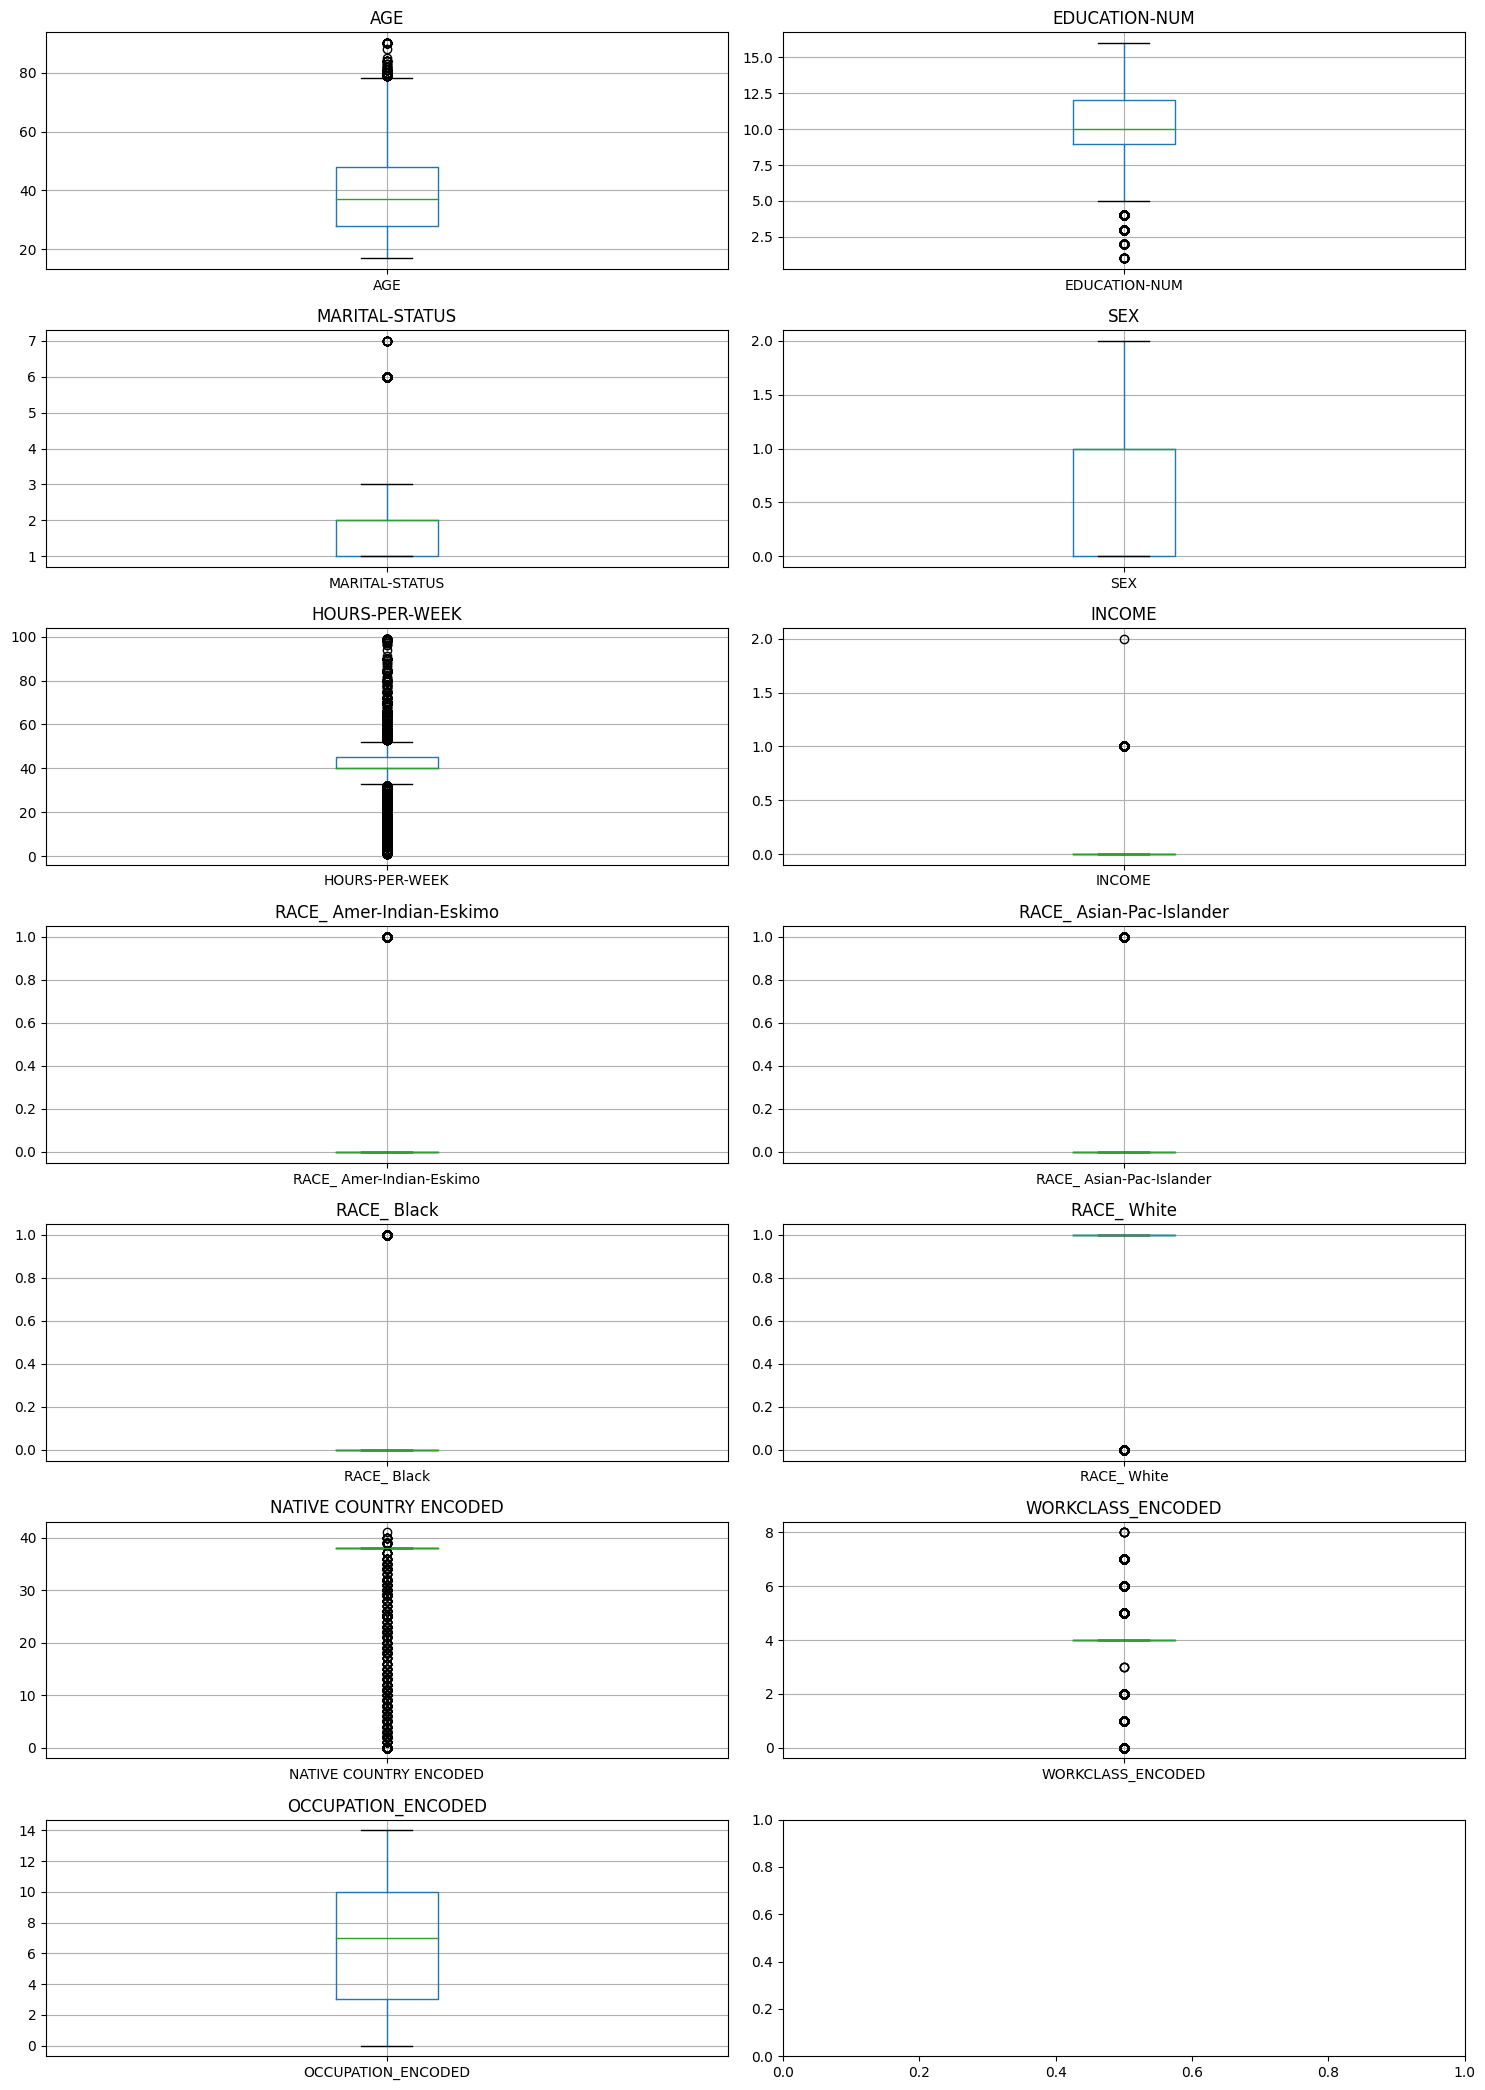

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
num_cols = df1.select_dtypes(include='number').columns

# Calculate the number of rows and columns needed for subplots
n_cols = 2  # You can adjust the number of columns
n_rows = (len(num_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Loop through each numerical column and create a boxplot
for i, col in enumerate(num_cols):
    ax = axes[i]
    df.boxplot(column=col, ax=ax)
    ax.set_title(col)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


**Me focalizo en aquellas variables que tienen menos outliers**

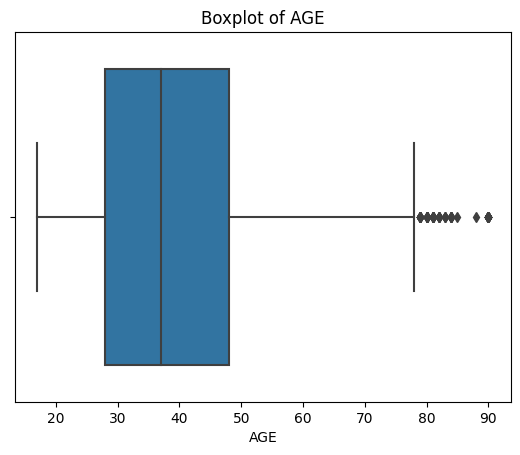

In [ ]:
sns.boxplot(x=df['AGE'])
plt.title('Boxplot of AGE')
plt.show()

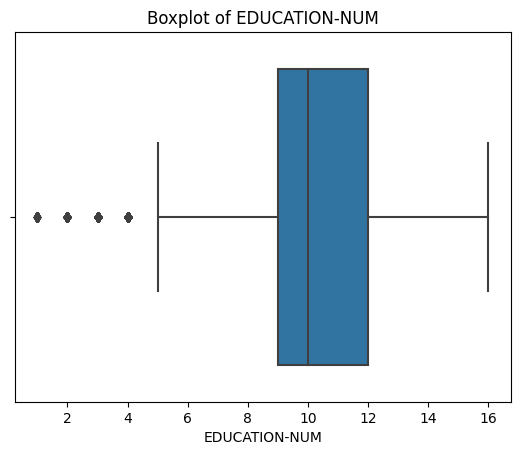

In [ ]:
sns.boxplot(x=df['EDUCATION-NUM'])
plt.title('Boxplot of EDUCATION-NUM')
plt.show()

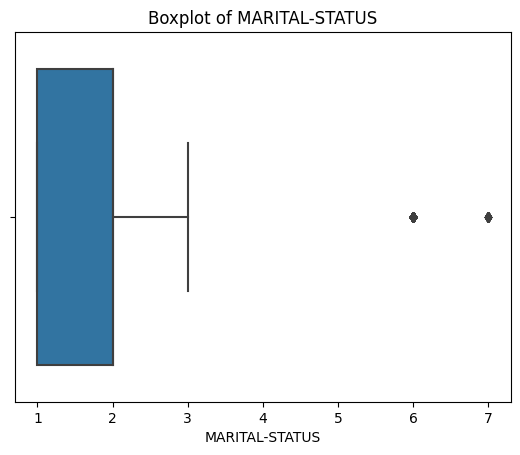

In [ ]:
sns.boxplot(x=df['MARITAL-STATUS'])
plt.title('Boxplot of MARITAL-STATUS')
plt.show()

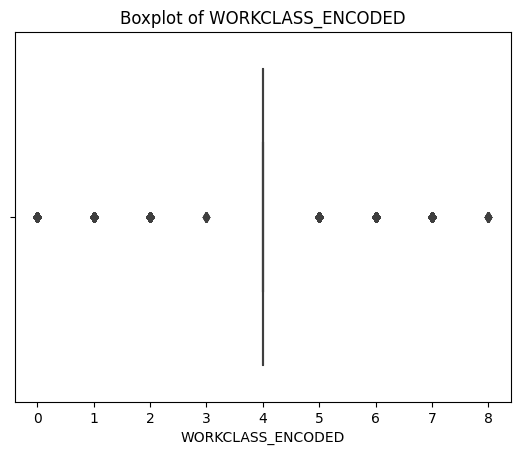

In [ ]:
sns.boxplot(x=df['WORKCLASS_ENCODED'])
plt.title('Boxplot of WORKCLASS_ENCODED')
plt.show()

Creo una funcion que me elimina los outliers usando el concepto de rango intercuartil

In [ ]:
import pandas as pd

def remove_outliers(df, columns, threshold=1.5):
    """
    Remove outliers from specified columns in a DataFrame using IQR method.

    Parameters:
    - df: DataFrame
    - columns: list of column names
    - threshold: float, default=1.5 (adjust as needed)

    Returns:
    - DataFrame without outliers
    """
    df_no_outliers = df1.copy()

    for col in columns:
        # Calculate the IQR for the column
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds to identify outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Remove outliers
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

    return df_no_outliers



Le paso las columnas que visualize antes que poseian pocos valores atipicos a la funcion que los elimina. Elijo estas variables ademas porque

In [ ]:
# Example usage:
# Assuming df is your DataFrame and columns_to_remove_outliers is a list of column names
columns_to_remove_outliers = ['AGE', 'EDUCATION-NUM', 'MARITAL-STATUS',"WORKCLASS_ENCODED"]
df_cleaned = remove_outliers(df1, columns_to_remove_outliers)
df1=df_cleaned

In [ ]:
target="INCOME"
df1[target] = df1.pop(target)

In [ ]:
df1.head()

,AGE,EDUCATION-NUM,MARITAL-STATUS,SEX,HOURS-PER-WEEK,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ White,NATIVE COUNTRY ENCODED,WORKCLASS_ENCODED,OCCUPATION_ENCODED,INCOME
2,38,9,3.0,1,40.0,0,0,0,1,38,4,6,0
3,53,7,1.0,1,40.0,0,0,1,0,38,4,6,0
4,28,13,1.0,0,40.0,0,0,1,0,5,4,10,0
5,37,14,1.0,0,40.0,0,0,0,1,38,4,4,0
8,31,14,2.0,0,50.0,0,0,0,1,38,4,10,1


<Axes: >

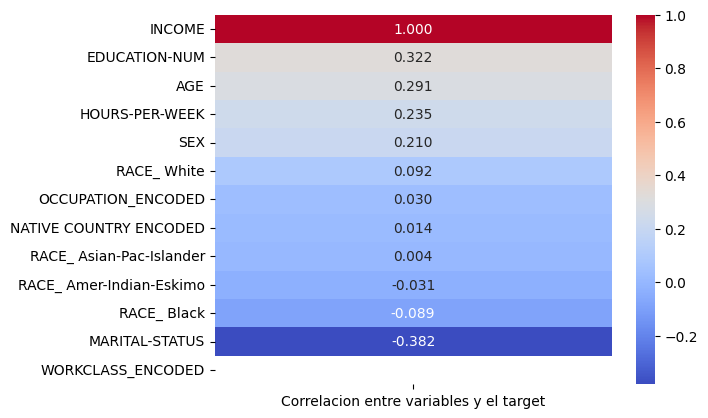

In [ ]:
target="INCOME"
correlacion=df1.corrwith(df1[target])
df_correlacion=pd.DataFrame(correlacion.sort_values(ascending=False),columns=["Correlacion entre variables y el target"])
sns.heatmap(df_correlacion,annot=True,cmap='coolwarm',fmt=".3f")

# MODELADO

Definimos el target

In [ ]:
target="INCOME"

Elijo mis variables x con las que intentare predecir el target

In [ ]:

X=df1.drop([target],axis=1)
y=df1[target]

In [ ]:
#Hago el split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn


# Sequential Forward Selection(sfs)
# pedimos que seleccione 4
# Usa CV para elegir la combinaciond de features

sfs = SFS(knn(),
          k_features=4)
sfs.fit(X_train, y_train)
sfs.k_feature_names_

('EDUCATION-NUM', 'MARITAL-STATUS', 'RACE_ Black', 'NATIVE COUNTRY ENCODED')

In [ ]:

#Creo las variables independientes train y test
X_train_final = X_train[['EDUCATION-NUM', 'MARITAL-STATUS', 'RACE_ Black', "NATIVE COUNTRY ENCODED"]]
X_test_final = X_test[['EDUCATION-NUM', 'MARITAL-STATUS', 'RACE_ Black', "NATIVE COUNTRY ENCODED"]]
#instancio el modelo y fiteo
model_final=knn()
model_final.fit(X_train_final,y_train)

KNeighborsClassifier()

Evaluo el rendimiento del modelo con el accuracy score. Metrica que representa la proporción de predicciones correctas en relación con el total de predicciones realizadas por el modelo.

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_test=model_final.predict(X_test_final)
accuracy_score(y_pred_test, y_test)


0.8231005372217959

Pequeño dataframe para tener mejor nocion de lo que significa esa metrica

In [ ]:
df_results = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_pred_test})
df_results

,True Labels,Predicted Labels
18983,0,0
2425,1,0
14595,0,0
28295,0,0
3715,0,0
...,...,...
8625,0,0
32063,1,0
9382,0,0
27444,0,0


In [ ]:
y_pred_train=model_final.predict(X_train_final)
accuracy_score(y_pred_train, y_train)

0.8269267668692037

# CONCLUSION - INSIGHTS


Las mejores 4 variables son:


*   EDUCATION-NUM
*   MARITAL-STATUS
*  RACE_ Black
*  NATIVE COUNTRY ENCODED



El rendimiento del modelo fue:
Accuracy Score= 0.8231


La educación es un factor relevante a la hora de tener mas chances de pertenecer al grupo de que ganan más.

En cuanto al estado civil, la mayoria de los que ganan mas estan casados civilmente.

Motivos…?
* Si estas casado posiblemente tengas más edad y más experiencia profesional, asi como mas años de estudio, lo que termina llevando a ganar más.
* Quizás la gente en buen estado socio-económico, tiene más facilidad para estar encontrar relación estable.

Hablando del pais de origen, de las 32561 personas del DataSet solo el 24.08% gana mas de 50k al año, esto es 7841 personas. De ellas el 91% pertenece a Estados Unidos, es decir, 7171 personas.

El censo fue realizado en EEUU, por lo cual esta variable no sea muy de utilidad. Quizás sea conveniente sacarlo del DataFrame para sucesivos modelos.

Por ultimo la raza negra. La probabilidad de pertenecer al grupo que gana más al tener esta característica, según los datos, parece ser bastante baja.
